#Configurar

Directorio raiz. Debe tenr una subcarpeta que se llame _Datasets_.

In [ ]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/'

Códigos de coberturas de nubes.

In [ ]:
cods_cob_nubes = [99]

Radios de las vecindades definidos para la investigación. Siempre incluir el cero (0).

In [ ]:
radios = [0,1]

Nombre de la capa de inclinación, sin extensión.

In [ ]:
nom_slp = 'slope_degrees_final'

#0. Entorno

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

In [ ]:
# explorar archivos
import glob
import os

In [ ]:
import pandas as pd

In [ ]:
# histograma
from matplotlib import pyplot as plt
# barplot
import seaborn as sns

Para hacer gráficas dinámicas.

In [ ]:
import plotly.express as px

Para reducir en número de datos aleatoriamente

In [ ]:
from numpy.random import choice

Para trabajar datos matriciales

In [ ]:
import numpy as np
np.version.version # versioon utilizada y funcional dentro de este notebook

'1.22.4'

Para escribir el dataset en Drive y en un .csv

In [ ]:
import csv

Para tomar el tiempo de entrenamiento.

In [ ]:
from datetime import datetime

#1. Importar

**Drivers**

Extrae la ruta de los tifs de las capas.

In [ ]:
drivers_dirs = glob.glob(os.path.join(dir_raiz,"Drivers/*.tif"))

Se importan los rásters.

In [ ]:
for dir in drivers_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [ ]:
drivers_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in drivers_dirs ])

---

**Constrains**

Extrae la ruta de los tifs de las capas.

In [ ]:
constrs_dirs = glob.glob(os.path.join(dir_raiz,"Constrains/*.tif"))

Se importan los rásters.

In [ ]:
for dir in constrs_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [ ]:
constrs_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in constrs_dirs ])

---

**Coberturas**

Extrae la ruta de los tifs de las capas.

In [ ]:
cob_dirs = glob.glob(os.path.join(dir_raiz,"Coberturas/*.tif"))

Se importan los rásters.

In [ ]:
for dir in cob_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [ ]:
cob_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in cob_dirs ])

#2. Explorar

**Drivers**

Se exploran los rásters de los Drivers.

In [ ]:
drivers_nams

['centro_poblados_cabeceras_proximity',
 'dem_argelia',
 'drenaje_senc_proximity',
 'slope_degrees_final',
 'vias_proximity']

In [ ]:
slope_degrees_final[slope_degrees_final < 0] = 0

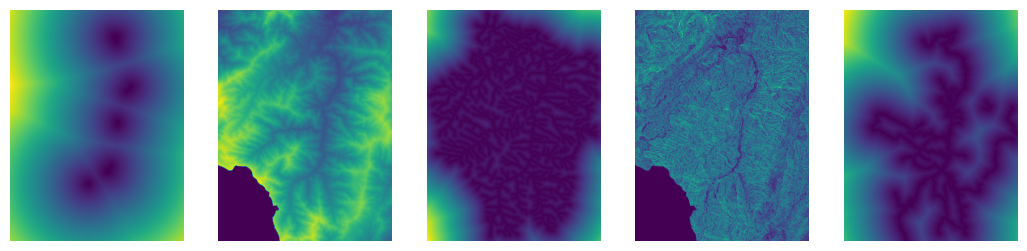

In [ ]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [ ]:
for nom in drivers_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

centro_poblados_cabeceras_proximity:
(3362, 2526)
 
dem_argelia:
(3362, 2526)
 
drenaje_senc_proximity:
(3362, 2526)
 
slope_degrees_final:
(3362, 2526)
 
vias_proximity:
(3362, 2526)
 


In [ ]:
#f, (a1,a2,a3,a4,a5) = plt.subplots(1, 5, figsize=(13,13))

#a1.imshow(dem_argelia)
#a1.axis('off')
#a2.imshow(slope_degrees_final)
#a2.axis('off')
#a3.imshow(centro_poblados_cabeceras_proximity)
#a3.axis('off')
#a4.imshow(drenaje_senc_proximity)
#a4.axis('off')
#a5.imshow(vias_proximity)
#a5.axis('off')

#f.show()

In [ ]:
#plt.figure(figsize=(13,2))
#for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  #plt.subplot(1,len(drivers_nams),n+1)
  #ax = px.histogram( choice(locals()[nom].ravel(),size=6500000,replace=False) , nbins=20 )
  #ax
#plt.show()

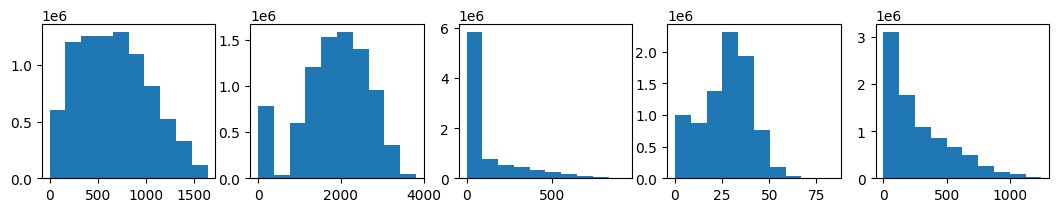

In [ ]:
plt.figure(figsize=(13,2))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.hist(locals()[ nom ].ravel())
  ax
plt.show()

---

**Constrains**

In [ ]:
constrs_nams

['mpio_mask_binario', 'raster_ambiental_binario', 'raster_comunitario_binario']

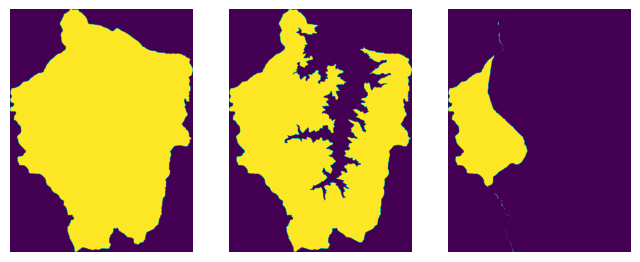

In [ ]:
plt.figure(figsize=(8,8))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [ ]:
for nom in constrs_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

mpio_mask_binario:
(3362, 2526)
 
raster_ambiental_binario:
(3362, 2526)
 
raster_comunitario_binario:
(3362, 2526)
 


In [ ]:
for nom in constrs_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts() )  
  print( ' ' )

mpio_mask_binario:
1    5415641
0    3076771
Name: valores, dtype: int64
 
raster_ambiental_binario:
1    4253873
0    4238539
Name: valores, dtype: int64
 
raster_comunitario_binario:
0    7515885
1     976527
Name: valores, dtype: int64
 


CÓDIGO DE COBERTURAS QUE SON NUBES! HAY QUE INCLUIRLAS EN LOS CONSTRAINS:

*   2000 - 99
*   2005 - 6986,10198,10202,10203
*   2010 - (no hay)
*   2015 - (no está el metadato)

In [ ]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012', 'cob_4_2018_2018']

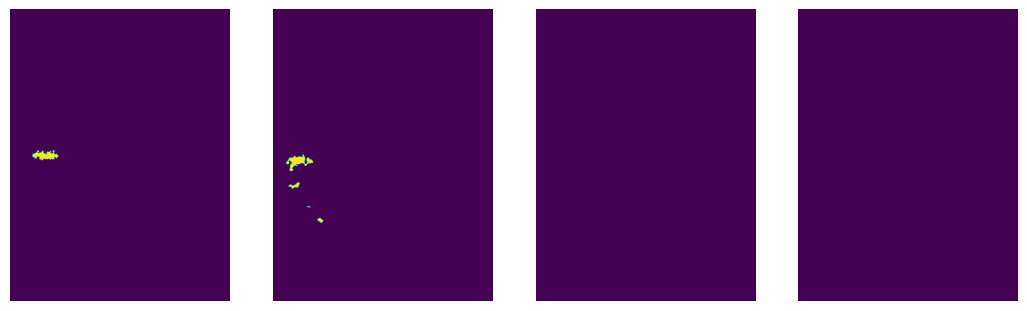

In [ ]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow( np.isin(locals()[ nom ], cods_cob_nubes ) )
  plt.axis('off')
  ax
plt.show()

In [ ]:
#raster_nubes_binario = np.zeros( locals()[cob_nams[0]].shape ).astype('int')
#for nom in cob_nams:
#  raster_nubes_binario = raster_nubes_binario | np.isin(locals()[nom], cods_cob_nubes ).astype('int')

#constrs_nams.append('raster_nubes_binario')
#ax = plt.imshow( raster_nubes_binario )
#plt.axis('off')
#ax
#plt.show()

---

**Coberturas**

In [ ]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012', 'cob_4_2018_2018']

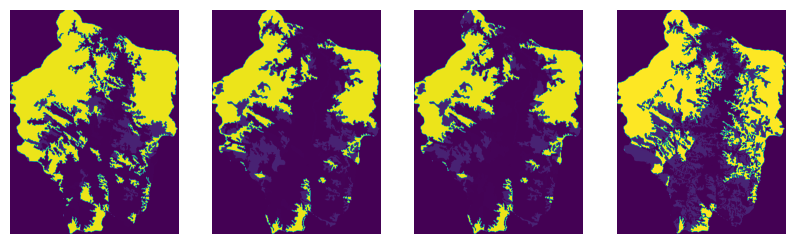

In [ ]:
plt.figure(figsize=(10,10))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [ ]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012', 'cob_4_2018_2018']

In [ ]:
for nom in cob_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts() )  
  print( ' ' )

cob_1_2000_2002:
valores
0          3076771
31111      2654756
244         766599
243         673320
323         336780
231         288792
3131        283284
242         138238
3132        123693
233          60559
334          33305
99           20261
511          13044
245           9329
3221          7844
111           3634
32111         2203
dtype: int64
 
cob_2_2005_2009:
valores
0          3076771
31111      1786716
243         880941
244         661206
3132        562243
242         448591
231         440484
323         231132
3131        155457
245          92241
233          53950
99           30637
3221         20020
3231         15421
511          13028
241          12504
32111         5854
111           5216
dtype: int64
 
cob_3_2010_2012:
valores
0          3076771
31111      1760185
243        1079846
244         574358
3132        547233
323         471066
242         330657
233         218037
3131        184817
231         145853
245          58636
3231         20099
51

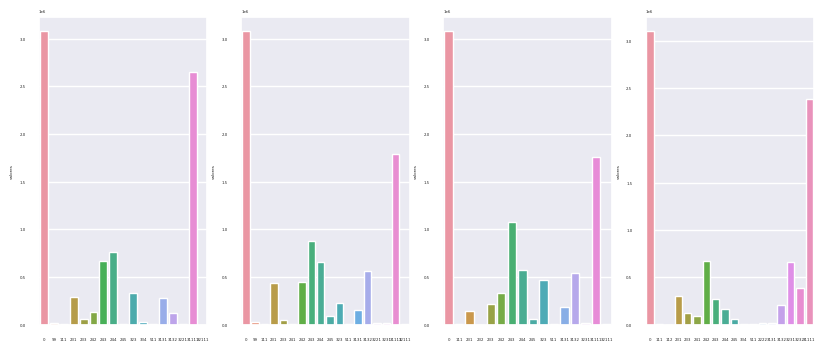

In [ ]:
sns.set(font_scale=0.25)
plt.figure(figsize=(10,4))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  d = pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts()
  sns.barplot(x=d.index, y=d)
plt.show()

In [ ]:
for nom in cob_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

cob_1_2000_2002:
(3362, 2526)
 
cob_2_2005_2009:
(3362, 2526)
 
cob_3_2010_2012:
(3362, 2526)
 
cob_4_2018_2018:
(3362, 2526)
 


---

#3. Escenarios y periodos

Escenarios

In [ ]:
constrs_nams.remove('mpio_mask_binario')

constrains_binario = np.invert( locals()[constrs_nams[0]] )
for n in range(len(constrs_nams)):
  constrains_binario = constrains_binario & np.invert( locals()[constrs_nams[n]] )
constrains_binario = constrains_binario & locals()['mpio_mask_binario']

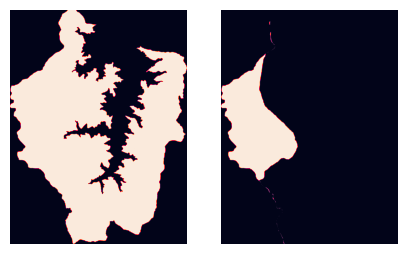

In [ ]:
plt.figure(figsize=(5,5))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

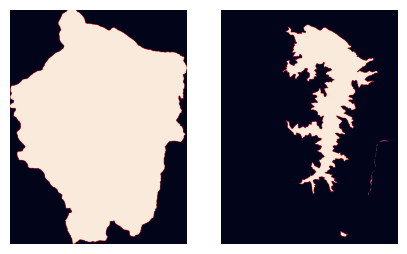

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
ax = plt.imshow(mpio_mask_binario)
plt.axis('off')
ax
plt.subplot(1,2,2)
ax = plt.imshow(constrains_binario)
plt.axis('off')
ax
plt.show()

Nombres de las capas de los rásters booleanos de los escenarios del estudio:
1.   Municipio completo
2.   Municipio con delimitación para el uso del suelo

In [ ]:
esc_nams = ['mpio_mask_binario','constrains_binario']

#4. Índices para construcción de datasets

Lista de los números de periodo actual.

In [ ]:
#inter_periodos = list(range(len(cob_nams)+1))[1:]
inter_periodos = range(len(cob_nams))
num_per = len(cob_nams)
print(cob_nams,)
print(inter_periodos,)
print(num_per)

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012', 'cob_4_2018_2018']
range(0, 4)
4


Número de filas y columnas del área de estudio.

In [ ]:
filas = range(mpio_mask_binario.shape[0])
columnas = range(mpio_mask_binario.shape[1])

Lista con códigos de coberturas en todos los periodos.

In [ ]:
cob_cods = []
for nom in cob_nams:
  cob_cods.extend(list(set(locals()[nom].ravel().tolist())))
cob_cods = sorted(list(set(cob_cods)))
cob_cods.remove(99)
cob_cods.remove(0)
print(cob_cods,)

[111, 112, 231, 232, 233, 241, 242, 243, 244, 245, 323, 334, 511, 2222, 3131, 3132, 3221, 3231, 3232, 31111, 32111]


Nombres de las características extraidas y su cantidad.

In [ ]:
feature_nams = ['dr_'+d[:5] for d in drivers_nams] + ['slp_mean_'+str(r) for r in radios if r!=0] + ['SI_cVt_'+str(r)+'_'+str(c) for r in radios for c in cob_cods ]
print(feature_nams,)

['dr_centr', 'dr_dem_a', 'dr_drena', 'dr_slope', 'dr_vias_', 'slp_mean_1', 'SI_cVt_0_111', 'SI_cVt_0_112', 'SI_cVt_0_231', 'SI_cVt_0_232', 'SI_cVt_0_233', 'SI_cVt_0_241', 'SI_cVt_0_242', 'SI_cVt_0_243', 'SI_cVt_0_244', 'SI_cVt_0_245', 'SI_cVt_0_323', 'SI_cVt_0_334', 'SI_cVt_0_511', 'SI_cVt_0_2222', 'SI_cVt_0_3131', 'SI_cVt_0_3132', 'SI_cVt_0_3221', 'SI_cVt_0_3231', 'SI_cVt_0_3232', 'SI_cVt_0_31111', 'SI_cVt_0_32111', 'SI_cVt_1_111', 'SI_cVt_1_112', 'SI_cVt_1_231', 'SI_cVt_1_232', 'SI_cVt_1_233', 'SI_cVt_1_241', 'SI_cVt_1_242', 'SI_cVt_1_243', 'SI_cVt_1_244', 'SI_cVt_1_245', 'SI_cVt_1_323', 'SI_cVt_1_334', 'SI_cVt_1_511', 'SI_cVt_1_2222', 'SI_cVt_1_3131', 'SI_cVt_1_3132', 'SI_cVt_1_3221', 'SI_cVt_1_3231', 'SI_cVt_1_3232', 'SI_cVt_1_31111', 'SI_cVt_1_32111']


In [ ]:
len(feature_nams)

48

#5. Escribir planos datasets en disco sesión

Borra lo que haya en el directorio base de la sesión.

In [ ]:
%%capture
!rm *

Se extrae una tabla con los nombres de los features extraidos, es decir, los encabezados de la tabla de _X_.

In [ ]:
with open( '/content/19050_v2_features.csv','a',newline='' ) as f:
  w1 = csv.writer(f)
  w1.writerow( feature_nams )

Se va a iterar a través de tres índices:

1. Periodos de estudio según los rásters disponibles de coberturas
2. Coordenadas del área de estudio
3. Escenarios

Se extraen cinco (5) diferentes tablas de datos por unidad de análisis:

1. Escenarios
2. Número de periodo actual
3. Coordenadas (_fila_ y _columna_)
4. Cobertura del periodo siguiente: _y_
5. Valores de las features del periodo actual: _X_

Se verifica que el periodo actual y el siguiente no tengan coberturas de nubes.

In [ ]:
cont = 0

with open( '/content/19050_v2_periodos.csv','a',newline='' ) as ppp:
  pp = csv.writer(ppp)
  with open( '/content/19050_v2_coords.csv','a',newline='' ) as ccc:
    cc = csv.writer(ccc)
    with open( '/content/19050_v2_escenario_delim.csv','a',newline='' ) as eee:
      ee = csv.writer(eee)
      with open( '/content/19050_v2_y.csv','a',newline='' ) as yyy:
        yy = csv.writer(yyy)
        with open( '/content/19050_v2_X.csv','a',newline='' ) as XXX:
          XX = csv.writer(XXX)

          for t in inter_periodos:
            for i in filas:
              for j in columnas:

                if cont % 1000000 == 0:
                  print(
                    datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "-" ,
                    str(round(100*cont/(len(inter_periodos)*len(filas)*len(columnas)),0)) , "%"
                  )
                cont += 1

                if locals()[esc_nams[0]][i,j] == 1 and locals()[cob_nams[t]][i,j] not in cods_cob_nubes:        # escenario completo y nubes

                  pp.writerow( [t] )                                                                            # periodo

                  cc.writerow( [i,j] )                                                                          # coordenadas

                  ee.writerow( [ int(np.where(locals()[esc_nams[1]][i,j]==1,1,0)) ] )                           # escenario delimitado

                  if t < num_per-1:
                    y = locals()[cob_nams[t+1]][i,j]
                    yy.writerow( [ np.where(y not in cods_cob_nubes,y,None) ] )                                 # y sin nubes
                  else:
                    yy.writerow( [None] )                                                                       

                  feat_vals = [] 
                  for d in drivers_nams:
                    feat_vals.append( locals()[d][i,j] )
                  for r in radios:
                    if r != 0:
                      cx0 = int(np.where((i-r)<0,0,(i-r)))
                      cx1 = i+r+1
                      cy0 = int(np.where((j-r)<0,0,(j-r)))
                      cy1 = j+r+1
                      feat_vals.append( np.mean( locals()[nom_slp][cx0:cx1,cy0:cy1] ) )
                  for r in radios:
                    if r == 0:
                      for c in cob_cods:
                        feat_vals.append( int( locals()[cob_nams[t]][i,j] == c ) )
                    else:
                      for c in cob_cods:
                        cx0 = int(np.where((i-r)<0,0,(i-r)))
                        cx1 = i+r+1
                        cy0 = int(np.where((j-r)<0,0,(j-r)))
                        cy1 = j+r+1
                        feat_vals.append( np.sum( locals()[cob_nams[t]][cx0:cx1,cy0:cy1] == c ) )
                  XX.writerow( feat_vals )                                                                      # X

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "- 100.0 %" )

10/05/2023 16:14:23 - 0.0 %
10/05/2023 16:16:08 - 3.0 %
10/05/2023 16:21:09 - 6.0 %
10/05/2023 16:28:41 - 9.0 %
10/05/2023 16:36:34 - 12.0 %
10/05/2023 16:43:53 - 15.0 %
10/05/2023 16:50:18 - 18.0 %
10/05/2023 16:55:14 - 21.0 %
10/05/2023 16:58:58 - 24.0 %
10/05/2023 17:00:13 - 26.0 %
10/05/2023 17:03:16 - 29.0 %
10/05/2023 17:09:46 - 32.0 %
10/05/2023 17:17:40 - 35.0 %
10/05/2023 17:25:07 - 38.0 %
10/05/2023 17:32:04 - 41.0 %
10/05/2023 17:37:39 - 44.0 %
10/05/2023 17:41:56 - 47.0 %
10/05/2023 17:44:24 - 50.0 %
10/05/2023 17:46:08 - 53.0 %
10/05/2023 17:51:02 - 56.0 %
10/05/2023 17:58:29 - 59.0 %
10/05/2023 18:06:14 - 62.0 %
10/05/2023 18:13:37 - 65.0 %
10/05/2023 18:20:02 - 68.0 %
10/05/2023 18:24:56 - 71.0 %
10/05/2023 18:28:40 - 74.0 %
10/05/2023 18:29:52 - 77.0 %
10/05/2023 18:32:57 - 79.0 %
10/05/2023 18:39:19 - 82.0 %
10/05/2023 18:47:28 - 85.0 %
10/05/2023 18:54:52 - 88.0 %
10/05/2023 19:01:42 - 91.0 %
10/05/2023 19:07:08 - 94.0 %
10/05/2023 19:11:30 - 97.0 %
10/05/2023 19:13:5

#6. Exportar a Google Drive

In [ ]:
%%capture
!cp /content/* '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'